🌟 이전 리포트들은 코드가 문서 전체에 산제하여 있고 그 내용이 문서의 대다수를 차지하고 있었다. 이에 리포트 작성 이후 다시 문서를 복기하였을 때, 전체적인 맥락을 파악하는 것에 어려움이 있었다. 그리하여 이번 리포트 이후로는 코드를 되도록이면 함수화하여 문서 하단의 **Code Collection**에 배치하기로 하였다.

# 고양이 수염 스티커 붙이기

---

학습한 내용을 바탕으로 사람의 얼굴 사진에 고양이 수염 스티커를 붙여 보도록 하자✊✊

## Step 0. 설계
---

얼굴 사진에 고양이 수염 스티커를 붙이기 위해서 다음과 같은 순서로 프로젝트를 진행 할 것이다.
1. 자료 수집 : 고양이 수염 스티커 이미지와 스티커를 붙일 인물 사진을 수집한다.
2. 얼굴 검출 & 랜드마크 검출
    - 인물 이미지로부터 얼굴 영역(*bounding box, bbox*)을 검출한다.
    - 얼국 영역에서 이목구비의 위치(*face landmark*)를 검출한다.
3. 스티커 적용 위치 확인하기
    - face landmark을 활용하여 인물 사진에서의 고양이 수염 스티커 위치는 지정한다.
4. 스티커 적용하기
    - 고양이 수염 스티커를 인물 사진에 붙여본다.
    - 스티커가 더 자연스럽게 보이도록 스티커를 반투명하게 만들어 본다.

## Step 1. 스티커와 이미지 구하기

---

- [flaticon 사이트](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)에서 고양이 수염 아이콘을 다운로드 받아 `cat-whiskers.png`로 저장하였고, 흑백인 이미지를 분홍색으로 칠하여 `cat-whiskers-pink.png` 이미지를 추가로 생성하였다.
- 웹캠을 이용하여 셀카 이미지로는 다양한 사진을 모으는 것이 한계가 있어 블랙핑크의 사진을 이용하여 프로젝트를 진행하고자 한다.
- 1차적인 실험은 `jennie.jpg` 이미지를 활용하여 진행하고 `blackpink`, `jennie` 디렉토리에 저장되어 있는 다른 사진들을 활용하여 완성된 코드를 여러 이미지에 적용해 볼 것이다.

In [17]:
!ls ./images/

cat-whiskers-pink.png  face_img_with_glass.png	img_info.json  king.png
cat-whiskers.png       face_img_with_mask.png	jennie	       not_working
face_img.png	       hero.png			jennie.jpg     team


In [18]:
!ls ./images/jennie

brightness_1.jpg  distance_01.jpg  distance_12.jpg  rotated_3.jpg
brightness_2.jpg  distance_02.jpg  glass_1.jpg	    rotated_4.jpg
brightness_3.jpg  distance_03.jpg  glass_2.jpg	    side_1.jpg
brightness_4.jpg  distance_04.jpg  glass_3.jpg	    side_2.jpg
brightness_5.jpg  distance_05.jpg  glass_4.jpg	    side_3.jpg
brightness_6.jpg  distance_06.jpg  mask_1.jpg	    side_4.jpg
brightness_7.jpg  distance_07.jpg  mask_2.jpg	    sunglass_1.jpg
clockwise_1.jpg   distance_08.jpg  mask_3.jpg	    sunglass_2.jpg
clockwise_2.jpg   distance_09.jpg  mask_4.jpg	    sunglass_3.jpg
clockwise_3.jpg   distance_10.jpg  rotated_1.jpg    sunglass_4.jpg
clockwise_4.jpg   distance_11.jpg  rotated_2.jpg


In [19]:
!ls ./images/blackpink

ls: './images/blackpink'에 접근할 수 없습니다: 그런 파일이나 디렉터리가 없습니다


## Step 2. 얼굴 검출 & 랜드마크 검출 하기

---


### 1. 얼굴 이미지 불러오기

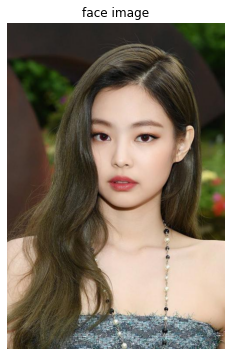

In [20]:
face_img = load_image(workspace_path + '/images/jennie.jpg')
show_image(face_img, "face image", (8,6))

### 2. detector를 이용하여 얼굴의 bounding box를 추출

face bounding box : rectangles[[(167, 192) (390, 415)]]


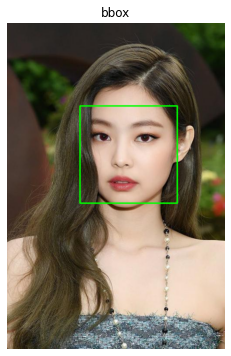

In [21]:
dlib_rects = detect_face(face_img)
print('face bounding box : {}'.format(dlib_rects))
show_image(get_face_with_bbox(dlib_rects, face_img), 'bbox', (8,6))

### 3. face landmark 탐색

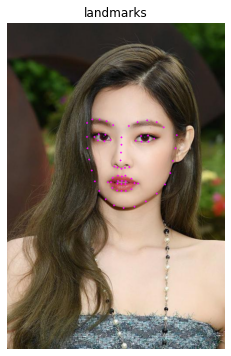

In [22]:
landmarks = detect_face_landmark(face_img, dlib_rects)
show_image(get_face_with_landmark(face_img, landmarks), 'landmarks', (8,6))

## Step 3. 스티커 적용 위치 확인하기

---


### 1. 스티커 이미지 불러오기
- 고양이 수염 이미지(*이후 스티커라 서술*)를 불러들인다.

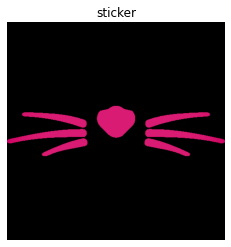

In [23]:
sticker_img = load_image(workspace_path + '/images/cat-whiskers-pink.png')
show_image(sticker_img, 'sticker')

- 스티커를 얼굴 이미지에 붙였을 때 자연스럽게 보이려면 스티커가 얼굴 영역을 벗어나지 않는 편이 좋다.
- 위 사항을 만족하기 위하여 스티커의 가로 길이를 face bounding box(*이후 bbox라 서술*)의 가로 길이와 같게 조절한다.

In [24]:
resized_stickers = get_resized_stickers(sticker_img, dlib_rects)
print('고양이 수염 이미지의 크기는 {}x{} 입니다.'.format(sticker_img.shape[1],sticker_img.shape[1]))
print('재조정된 고양이 수염 이미지의 크기는 {} 입니다.'
      .format([(img.shape[1], img.shape[0]) for img in resized_stickers]))

고양이 수염 이미지의 크기는 512x512 입니다.
재조정된 고양이 수염 이미지의 크기는 [(224, 224)] 입니다.


### 2. 스티커 위치 선정
- **idea** 🤔 스티커에서 나타나는 코의 중앙점을 이미지의 코의 중앙점과 같은 위치로 맞춰준다.
- 코드구상
    1. 이미지에서 코의 중앙점(landmark 30번)을 찾는다. -> `nose_center_point`
    2. 스티커에서 코의 중앙점을 찾는다. -> `stiker_center_point`
    3. 스티커의 위치는 1에서 2만큼 떨어져 있는 위치이다. -> `sticker_position = nose_center_point - stiker_center_point`

<br />

#### 1. 얼굴 이미지에서 코의 중앙점(landmark 30번)을 찾는다.

In [25]:
nose_center_point = landmarks[0][30]
nose_center_point

(260, 317)

#### 2. 스티커에서 코의 중앙점을 찾는다.
**(1)** 스티커의 중앙점을 찾아서 위치를 출력해 본다.

In [26]:
cat_whiskers = resized_stickers[0]

스티커의 중심점 좌표 : (112, 112)


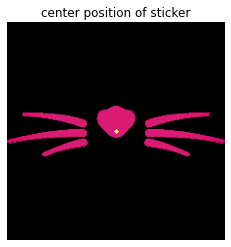

In [27]:
cat_whiskers_h, cat_whiskers_w, c = cat_whiskers.shape
stiker_center_point = (cat_whiskers_w // 2, cat_whiskers_h // 2)
print("스티커의 중심점 좌표 : {}".format(stiker_center_point))

cat_whiskers_show = cat_whiskers.copy()
cv2.circle(cat_whiskers_show, stiker_center_point, 2, (0, 255, 255), -1) # yellow
show_image(cat_whiskers_show, 'center position of sticker')

#### 3. 스티커의 위치를 지정한다.

In [28]:
sticker_position = nose_center_point[0] - stiker_center_point[0], \
                   nose_center_point[1] - stiker_center_point[1]
print("얼굴 이미지에서의 스티커 위치 : {}".format(sticker_position))

얼굴 이미지에서의 스티커 위치 : (148, 205)


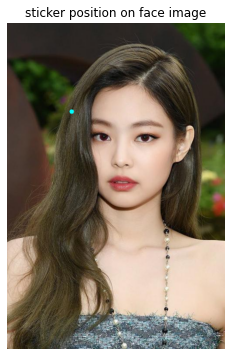

In [29]:
img_show = face_img.copy()
cv2.circle(img_show, sticker_position, 5, (255, 255, 0), -1)
show_image(img_show, 'sticker position on face image', (8,6))

- 위 과정을 통하여 스티커의 위치를 어떻게 잡는지를 알아보았다.
- 이번 프로젝트에서는 다수의 인물이 들어간 사진 역시 대상으로하고 있으므로 위 과정을 다수의 bbox과 스티커에 적용되도록 코드를 작성하였다.

In [30]:
stickers_pos = get_stickter_pos_with_center_pos(landmarks, 
                                                 dlib_rects,
                                                 resized_stickers)
stickers_pos

[(148, 205)]

## Step 4. 스티커 적용하기

---


### 1. 스티커 자르기
스티커를 붙였을 때, 스티커가 붙여지는 영역이 얼굴 사진의 영역을 벗어난다면 스티커 사진을 적절히 잘라내주어야 한다. 이때 영역을 벗어나는 경우는 아래와 같다.
![cut_sticker](./cut_sticker.png)
- 스티커 사진의 시작점이 음수인 경우
    - `x1 < 0` 또는 `y1 < 0`
- 스티커 사진의 시작점 + 스티커 사진의 크기가 얼굴 사진의 크기보다 큰 경우
    - `x2 > w` 또는 `y2 > h`
    - 이때 `x2 = x1 + width(sticker)`, `y2 = y1 + height(sticker)`이다.

In [31]:
croped_stickers = get_croped_stickers(face_img, resized_stickers, stickers_pos)
len(croped_stickers)

1

### 2. 스티커 붙이기
1. 노드에서 학습했던 스티커를 붙이는 방법은 다음과 같다.
- 얼굴 이미지에서 스티커가 붙을 영역을 지정한다. `refined_sticker_position ~ refined_sticker_position + cat_whiskers_image size` → `roi(region of interest)`
- roi 구역의 얼굴 이미지에서 스티커가 존재해야 하는 픽셀좌표에 대해서는 스티커의 픽셀정보가 스티커가 존재하지 않아야 픽셀좌표에 대해서는 roi의 픽셀정보로 각 픽셀값이 대체되도록 지정한다.

2. 하지만 이 과정에서는 스티커에 투명도를 주는 단계가 존재하지 않는다. 이 점을 해결하기 위하여 `cv2.addWeighted()`을 사용하여 아래와 같이 코드를 작성하고 결과를 얻을 수 있었다.
    - **idea** 🤔 roi와 합성되는 스티커가 애초에 반투명한/뒷배경이 같이 비치는 스티커라면 합성된 이미지 상에 스티터가 반투명해 보일 것이다.
        1. roi에서 스티커가 붙을 영역만 파져 있는 이미지를 준비한다.
            - 이는 `mask_inv`를 mask로 이용한 roi와 roi 간의 `cv2.bitwise_and` 연산 결과로 얻을 수 있다.
            - 위의 연산은 mask의 영역 내에서 두 대상 배열이 같은 값을 가지는 것만을 반환한다.
            - `mask_inv`의 대상 영역은 스티커 부분을 제외한 영역이고, 연산 대상으로 동일한 roi를 넣어 주었으므로 스티커 영역이 파여 있는 얼굴 이미지를 얻을 수 있다.
        2. 스티커 이미지에서 내용이 존재하지 않는(=수염의 영역이 아닌) 이미지를 준비힌다.
            - 이는 `mask`를 mask로 이용한 스티커 이미지간의 `cv2.bitwise_and` 연산 결과로 얻을 수 있다.
        3. `cv2.addWeighted` 함수를 이용하여 불투명한 스티커 이미지를 얻는다.
            - cv2.addWeighted(src1, alpha, src2, beta, gamma)로 얻어지는 이미지는 다음과 같은 공식으로 만들어 진다.
            - $$ dst = img1 × \alpha + img2 × \beta + \gamma $$
            - 이미지 src1과 src2가 각각 alpha와 beta 만큼의 가중치를 가지고 더해진다는 의미이다.
            - 이를 통하여 얼굴 이미지가 0.4, 스티커가 0.6의 가중치를 가지는 새로운 이미지를 얻을 수 있다.
        4. 이전에 사용했던 방식처럼 스티커를 붙이되, 얼굴 이미지에 대체 되는 스티커가 원본 스티커가 아닌 이전 단계에서 얻은 불투명한 스티커가 되도록한다.

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


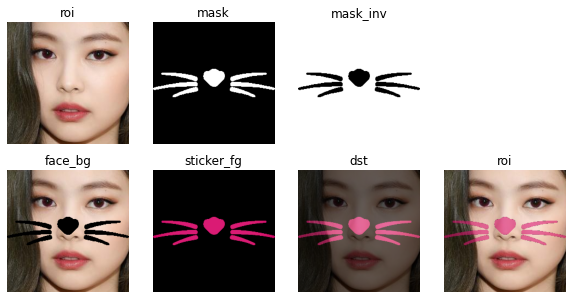

In [32]:
img_result = get_face_with_sticker_with_log(face_img, croped_stickers, stickers_pos, 1)

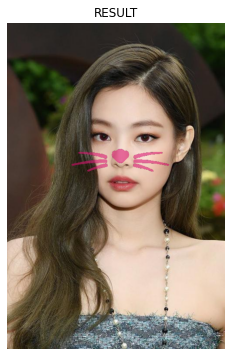

In [33]:
show_image(img_result, 'RESULT', (8,6))

🎉 완성! 얼굴 이미지에 고양이 수염 스티커 붙이기에 성공하였다!

## Step 5. 평가
---

위 과정들을 모은 하나의 함수 `test`을 이용하여 다양한 상황의 이미지에 대한 동작을 비교해보았다.

### 1. 수집한 이미지 불러오기

In [34]:
!ls ./images/jennie
!echo 
!ls ./images/team

brightness_1.jpg  distance_01.jpg  distance_12.jpg  rotated_3.jpg
brightness_2.jpg  distance_02.jpg  glass_1.jpg	    rotated_4.jpg
brightness_3.jpg  distance_03.jpg  glass_2.jpg	    side_1.jpg
brightness_4.jpg  distance_04.jpg  glass_3.jpg	    side_2.jpg
brightness_5.jpg  distance_05.jpg  glass_4.jpg	    side_3.jpg
brightness_6.jpg  distance_06.jpg  mask_1.jpg	    side_4.jpg
brightness_7.jpg  distance_07.jpg  mask_2.jpg	    sunglass_1.jpg
clockwise_1.jpg   distance_08.jpg  mask_3.jpg	    sunglass_2.jpg
clockwise_2.jpg   distance_09.jpg  mask_4.jpg	    sunglass_3.jpg
clockwise_3.jpg   distance_10.jpg  rotated_1.jpg    sunglass_4.jpg
clockwise_4.jpg   distance_11.jpg  rotated_2.jpg

1.jpeg	5.jpg  6.jpg  7.jpeg


- 이미지는 workspace 하위의 images 디렉토리에 모여있다.
- jennie 디렉토리에는 여러 유형의 독사진을 모았고, team 디텍토리에는 여러명이 함께 있는 사진을 모았다.
- 평가에 필요한 이미지들을 다음의 변수에 저장한다.
    - solo_imgs(dict)
    - ├ brightness(list)
    - │ └ [ img path, disp_size ]
    - ├ full(list)
    - ├ galaxy(list)
    - ├ glass(list)
    - ├ mask(list)
    - ├ rotated(list)dp
    - └ side(list)
    - taem_imgs(list)
    - sticker_path
- `disp_size`는 이미지 출력시 사용되는 figsize이다. 이미지가 문서에서 잘 보일 수 있도록 종횡비를 고려하여 사전에 정해두었다. 해당 정보는 imges 디렉토리 안의 `img_info.json`에 저장되어 있다.

In [35]:
# 디렉토리 경로
jennie_dir_path = workspace_path + '/images/jennie'
team_dir_path = workspace_path + '/images/team'
sticker_path = workspace_path + '/images/cat-whiskers.png'

In [36]:
# img_info 로드
with open(workspace_path + '/images/img_info.json', 'r') as f:
    img_info = json.load(f)

In [37]:
# jennie 디렉토리 이미지 로드 및 변수에 저장
names = [os.path.basename(x) for x in glob.glob(jennie_dir_path + '/*')]
names.sort()

solo_imgs = {}
for name in names:
    dir_name = name.split('_')[0]
    e = [load_image(jennie_dir_path + '/' + name), img_info["jennie"][name]]
    if dir_name in solo_imgs :
        solo_imgs[dir_name].append(e) 
    else :
        solo_imgs[dir_name] = [e]
solo_imgs.keys()

dict_keys(['brightness', 'clockwise', 'distance', 'glass', 'mask', 'rotated', 'side', 'sunglass'])

In [38]:
# blackpink 디렉토리 이미지 로드 및 변수에 저장
names = [os.path.basename(x) for x in glob.glob(team_dir_path + '/*')]
names.sort()

team_imgs = []
for name in names:
    team_imgs.append([load_image(team_dir_path + '/' + name), img_info["team"][name]])

In [39]:
# 스티커 이미지 로드
sticker_img = load_image(sticker_path)

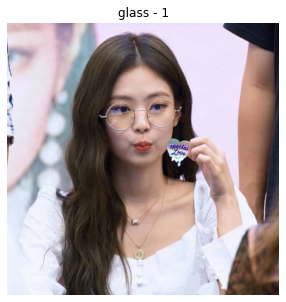

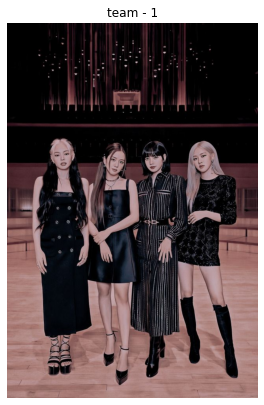

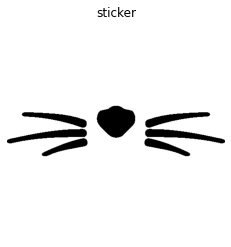

In [40]:
# 로드 데이터 확인
show_image(solo_imgs['glass'][0][0], 'glass - 1', solo_imgs['glass'][0][1])
show_image(team_imgs[0][0], 'team - 1', team_imgs[0][1])
show_image(sticker_img, 'sticker')

### 2. 이미지 밝기에 따른 성능평가

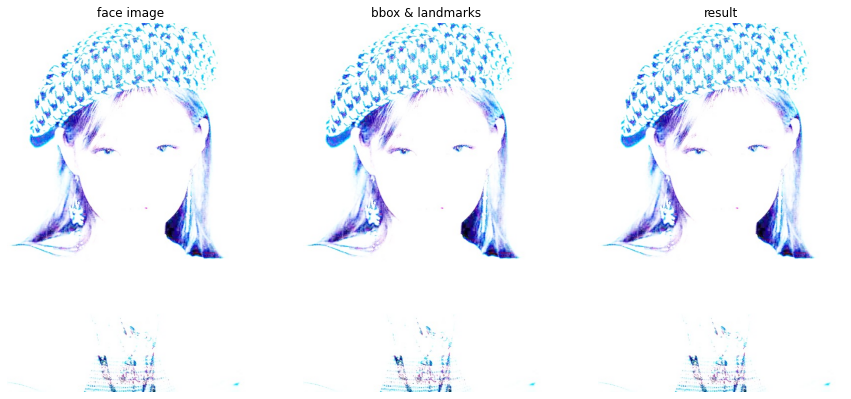

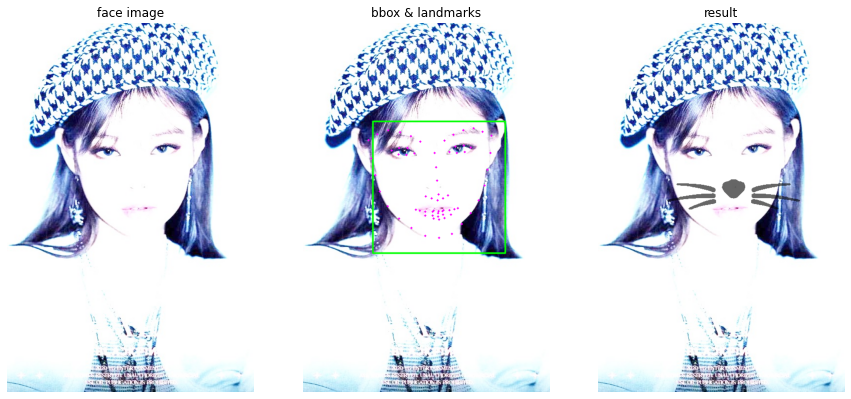

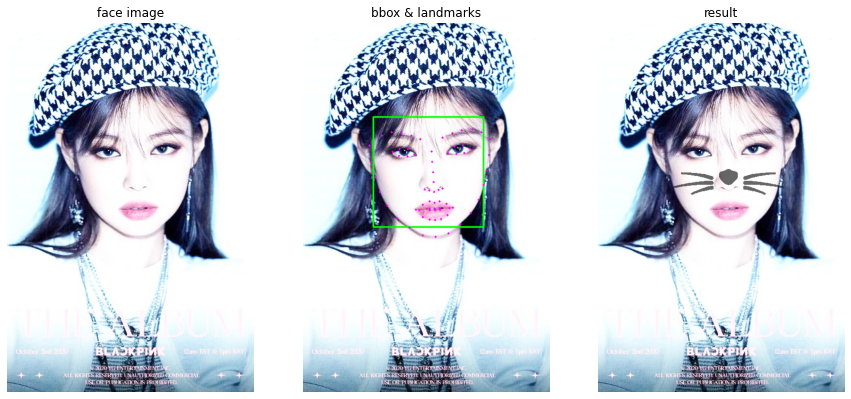

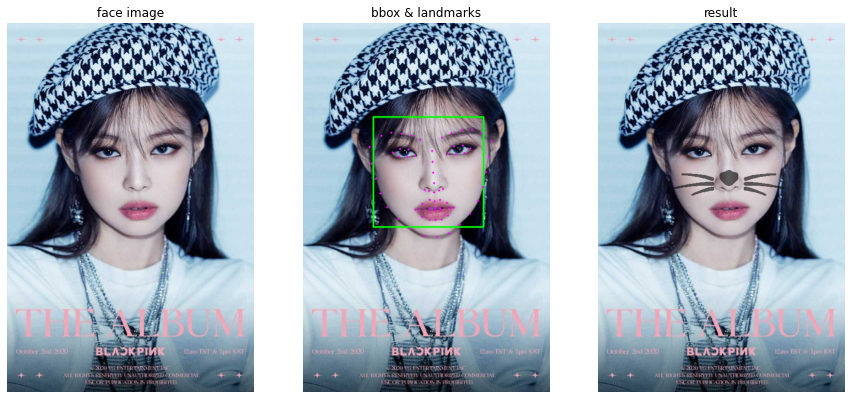

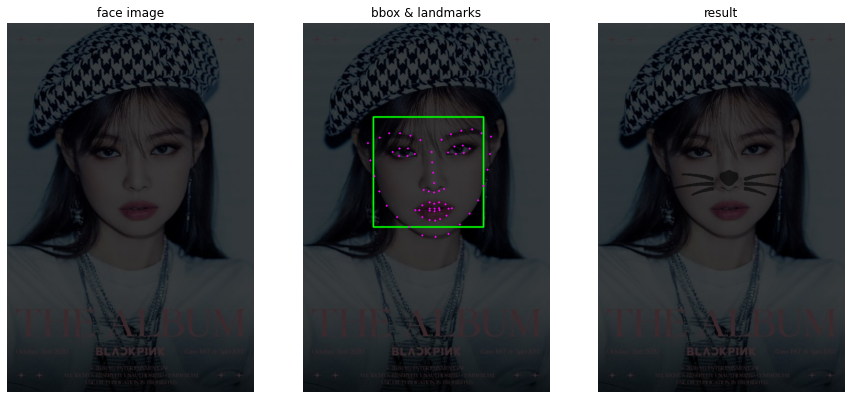

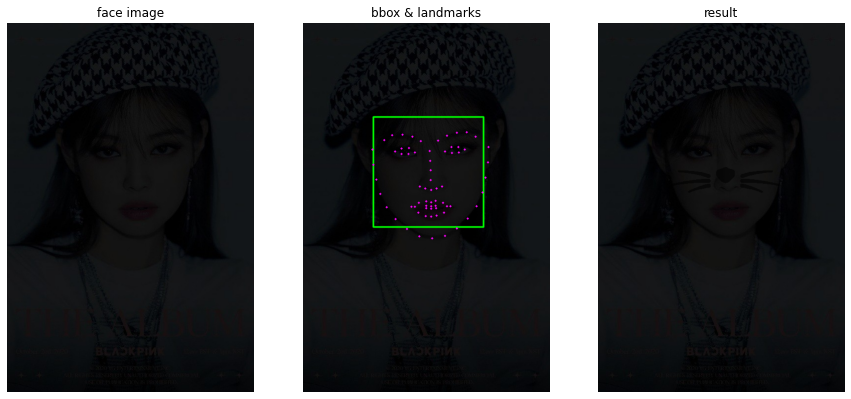

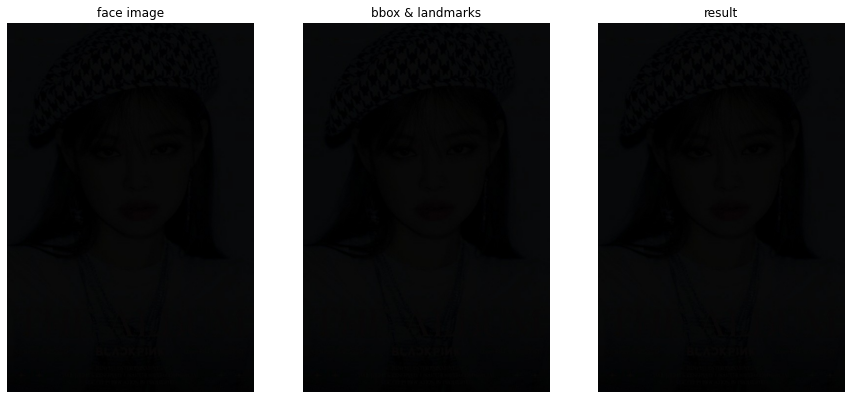

In [41]:
res = [ test(img_data[0], img_data[1], sticker_img, 0) for img_data in solo_imgs['brightness'] ]

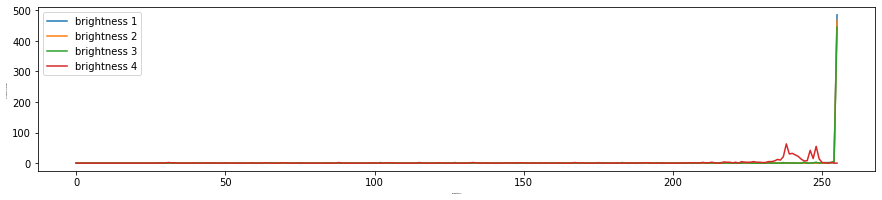

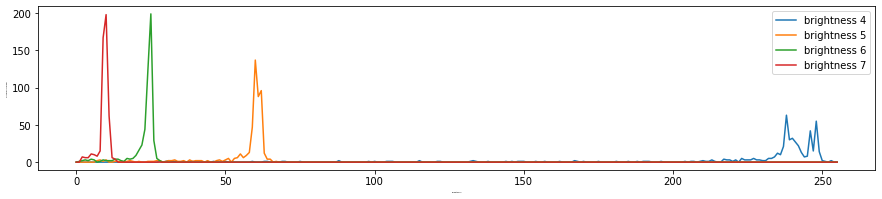

min    max         avg        std
brightness 1  4.0  255.0  251.099011  17.053457
brightness 2  2.0  255.0  237.534381  42.348029
brightness 3  0.0  255.0  216.832376  63.821151
brightness 4  0.0  255.0  171.363565  71.864263
brightness 5  0.0   76.0   42.760235  18.039262
brightness 6  0.0   40.0   16.964944   7.466739
brightness 7  0.0   15.0    6.939117   3.247148

In [42]:
# print histogram and statistic
def set_plt():
    plt.figure(figsize=(15, 3))
    plt.ylabel('number of pixel')
    plt.xlabel('brightness')


df = pd.DataFrame(columns=("min", "max", "avg", "std"))
set_plt()

for i in range(len(res)):
    hsv = cv2.cvtColor(solo_imgs['brightness'][i][0], cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    hist = cv2.calcHist(v, [0], None, [256], [0,256])
    plt.plot(hist, label='brightness {}'.format(i+1))

    df.loc['brightness {}'.format(i+1)] = [v.min(), v.max(), v.mean(), v.std()]
    
    if i == 3:
        plt.legend(), plt.show()
        
        set_plt()
        plt.plot(hist, label='brightness {}'.format(i+1))

plt.legend(), plt.show()

display(df)

- 출력된 이미지를 가장 위에 있는(가장 밝은) 이미지부터 brightness 1, 2, 3, 4, 5, 6, 7 순으로 명명하였다.
- 명도에 따른 수행결과를 비교하기 위하여 준비한 7개의 이미지 중 2개의 이미지(brightness 1, brightness_7)에서 face detection이 실패하여 않아 bounding box를 찾을 수 없었다.
- brightness 1의 경우 : 해당 이미지 밝기의 평균이 251 근처였고 그것보다 조금 어두운, 평균이 237 근처인 이미지에서는 정상적으로 face detection이 수행된 것을 확인할 수 있었다.
- brightness 7의 경우 : 해당 이미지 밝기의 평균이 7 근처였고 그것보다 조금 밝은, 평균이 17 근처인 이미지에서는 정상적으로 face detection이 수행된 것을 확인할 수 있었다.
- 위의 결과로부터 너무 밝거나 너무 어두운 이지미의 경우 face detection이 원활하게 이루어지지 않을 가능성이 있다는 사실을 추론할 수 있다. 하지만 코드에 사용된 detector이 HOG feature를 기용하고 있다는 점을 생각하면 단순히 '너무 밝다/어둡다'는 사실이 face detection의 성공여부를 결정한다고 생각하기는 어렵다.
- 여기서 주목해야 할 부분은 face detection이 실패한 brightness 7의 표준편차가 매우 낮다/픽셀들의 값이 큰 차이가 없다는 것이다. 이것은 원본 이미지(brightness 4)가 가지고 있던 표현과 밝기가 변형된(brightness 7의)의 표현이 달라졌을 수 있으며 그 점이 원인이 되어 brightness 7에서 face detection이 실패했을 수 있다는 것을 시사한다.
- brightness 1의 경우 : `명도의 표준편차가 낮은 이미지는 face detection이 어렵다.`는 위의 가설의 정확한 반례가 brightness 1이다. brightness 1은 face detection에 성공한 brightness 6 보다 높은 표준편차를 가진다. 하지만 가설을 `이목구미 구역의 명도의 표준편차가 낮은 이미지는 face detecion이 어렵다.`로 변형한다면 brightness 1도 설명이 가능해진다. 사진 속 인물은 검은색 머리카락과 눈을 가졌으며 검은색 체크무늬가 들어간 모자를 착용하고 있으며 사진상으로 눈동자를 제외한 대부눈의 이목구비가 흰색에 가깝다. 사진이 가지고 있던 기존의 검은색 요소들이 표준편차를 늘리는 것에 일조를 하였고 이를 제외한 영역의 표준편차를 다시 구한다면 그 값이 나아질 것이라는 가정을 할 수 있다. 이러한 가정들이 명도와 face detection의 관계에 대한 가설에 힘을 싣어 줄 수 있을 것이다.

### 3. 촬영거리에 따른 성능평가

- 설계
    - distance1 ~ distance8 : 같은 크기(300x480)의 이미지들로 넘버링이 뒤로 갈수록 사진 속 인물의 얼굴이 작아지도록 배치하였다. 이를 통하여 얼굴 영역 크기에 따른 성능을 평가해 보고자 한다.
    - distance9 ~ distance12 : 같은 사진 구도의 이미지들로 넘버링이 뒤로 갈수록 화질이 절반으로 줄어들도록 하였다. 이를 통하여 화질에 따른 성능을 평가해 보고자 한다.

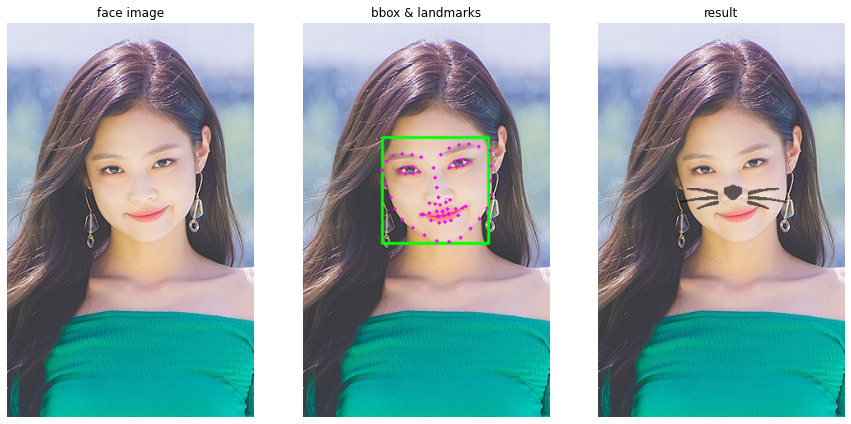

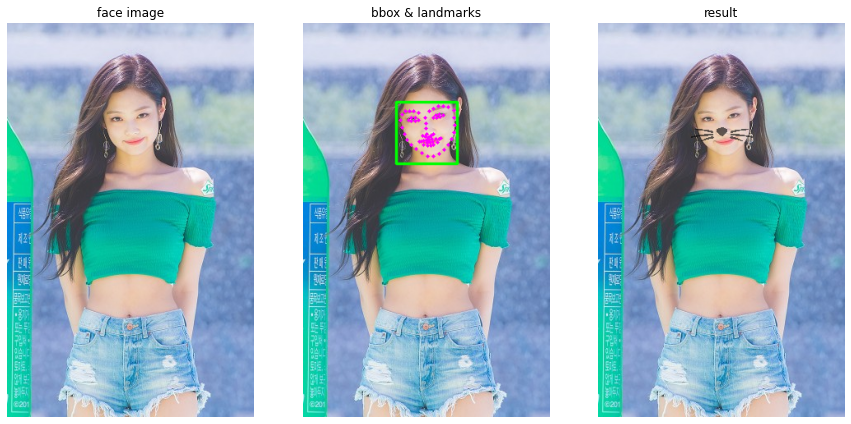

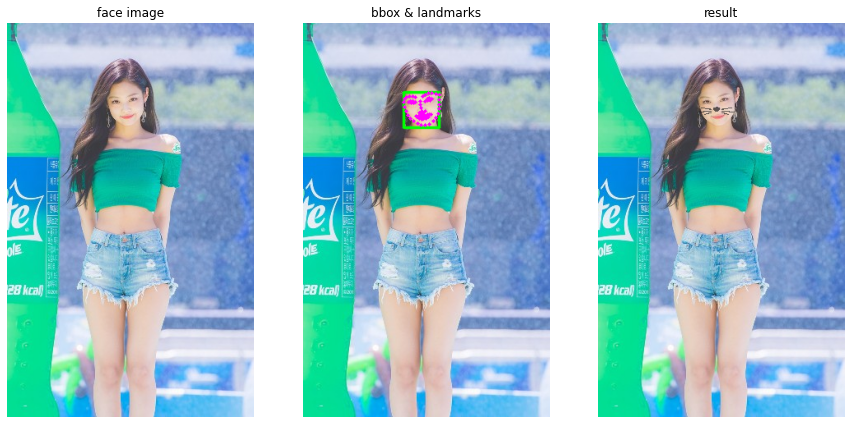

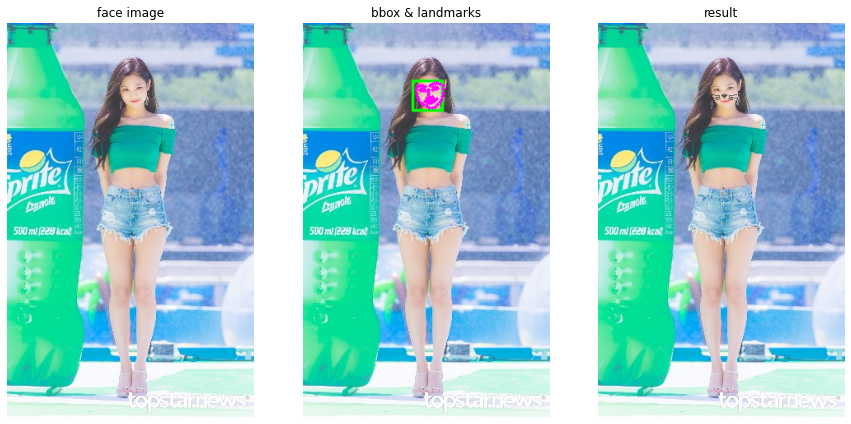

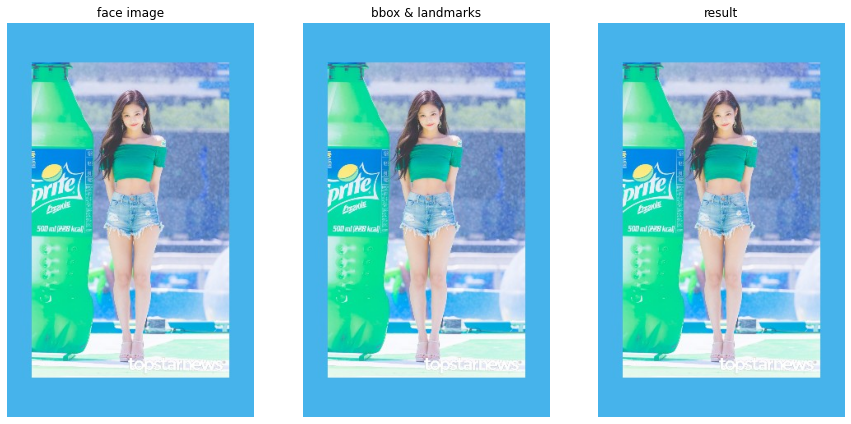

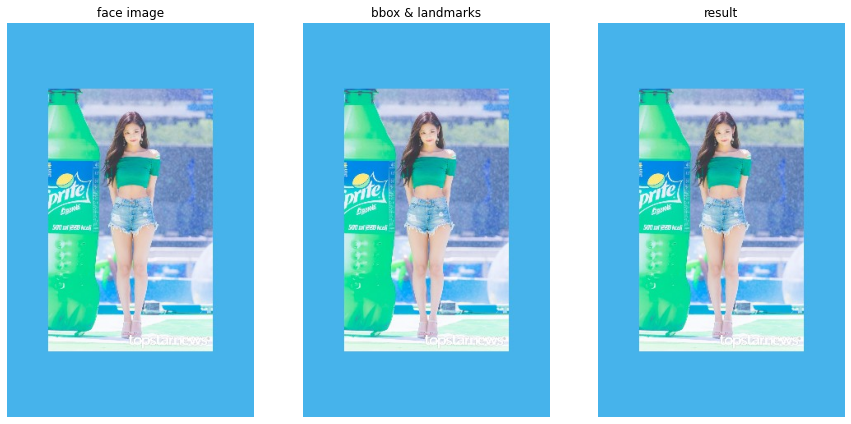

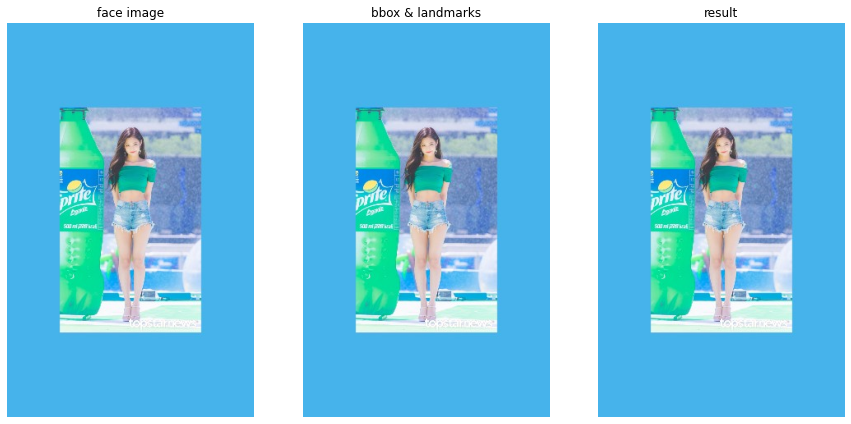

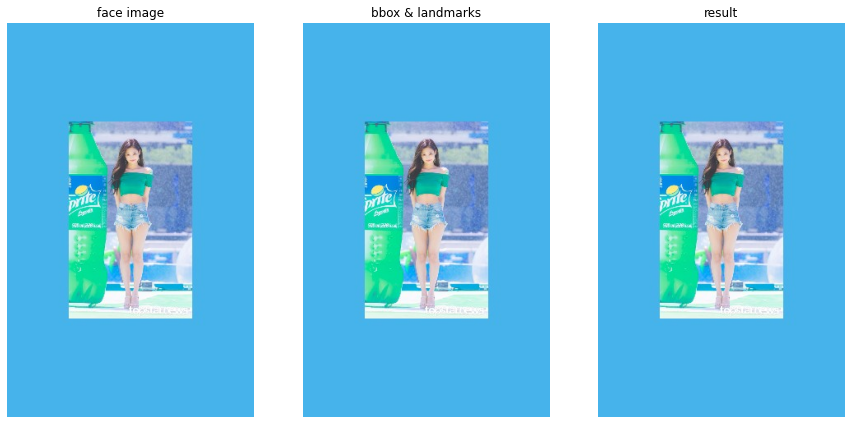

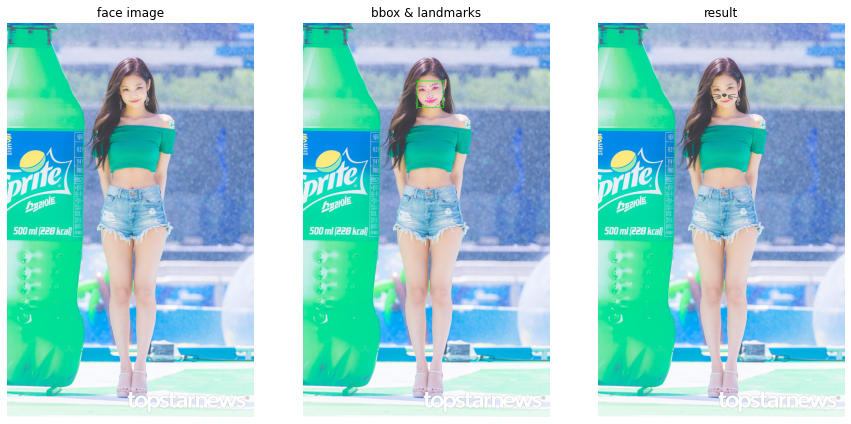

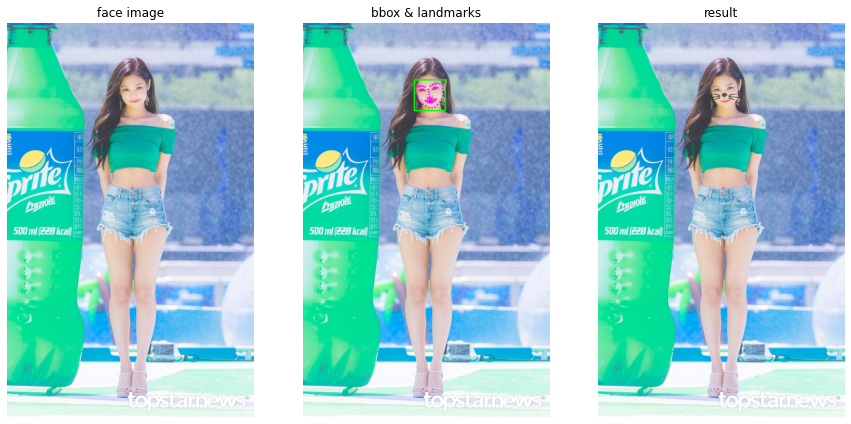

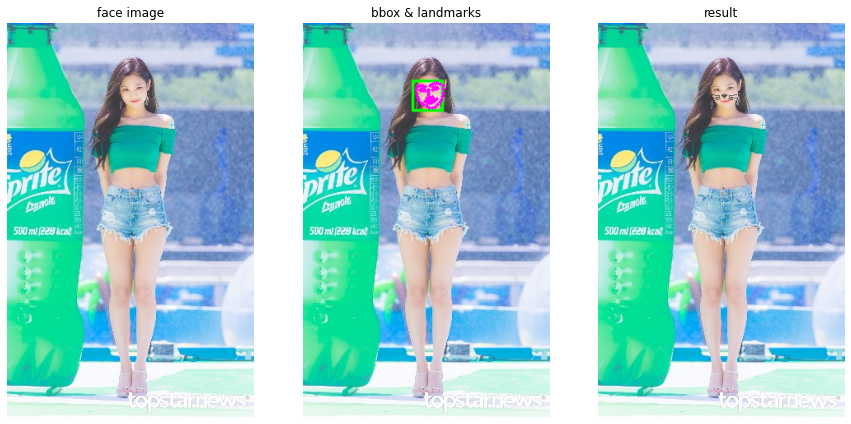

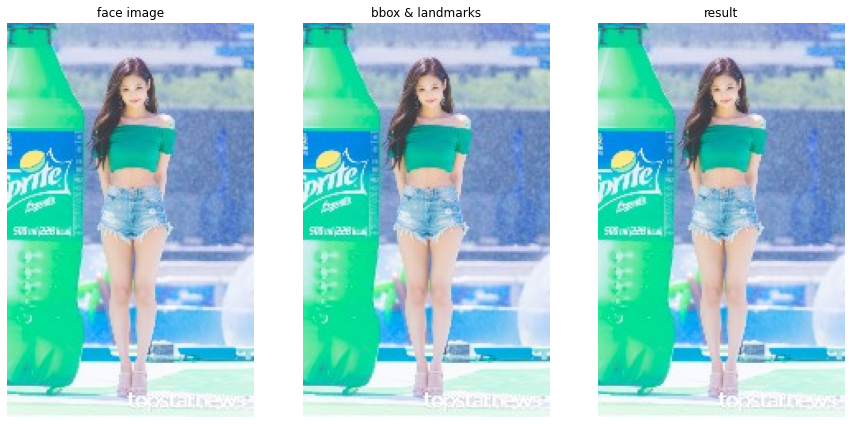

In [43]:
shape = [ img_data[0].shape for img_data in solo_imgs['distance'] ]
res = [ test(img_data[0], img_data[1], sticker_img, 0) for img_data in solo_imgs['distance'] ]

In [44]:
# print success and shape
df = pd.DataFrame(columns=("width", "height", "success"))
success= ['o', 'o', 'o', 'o', 'x', 'x', 'x', 'x', 'o', 'o', 'o', 'x']
for i in range(len(success)):
    df.loc['distance {}'.format(i+1)] = [res[i].shape[1], res[i].shape[0], success[i]]
display(df)

width height success
distance 1    300    480       o
distance 2    300    480       o
distance 3    300    480       o
distance 4    300    480       o
distance 5    300    480       x
distance 6    300    480       x
distance 7    300    480       x
distance 8    300    480       x
distance 9   1200   1920       o
distance 10   600    960       o
distance 11   300    480       o
distance 12   150    240       x

- distance1 ~ distance8의 경우 : distance1 ~ distance4에서는 face detection에 성공하였지만 distance5 ~ distance8에서는 실패하였다. 이 결과를 통하여 dlib의 face dector는 얼굴의 영역이 어느 정도의 크기를 가져야만 정상적으로 작동 된다고 생각할 수 있다. 일견 당연한 것이 HOG 방식은 gradient를 이용하여 얼굴의 윤곽을 잡아내는 것인데, 열굴의 영역이 너무 작다면 작은 영역에 많은 정보가 들어가 gradient는 각 픽셀마다 급격하게 변화할 것이고, 이는 face dector가 정확한 얼굴 영역을 찾는데 방해가 될 것이다.
- distance9 ~ distance12의 경우 : distance9 ~ distance11에서 face detection에 성공하였지만, distance12에서는 실패하였다. 위와 마찬가지의 이유에서 실패하였다고 생각된다. 

### 3. 얼굴 각도에 따른 성능평가

##### 얼굴을 기울인 경우
- 얼굴을 기울인 상태에서 촬영된 이미지에서 face dectection과 face landmark 탐색이 원활이 이루어지는지 확인한다.

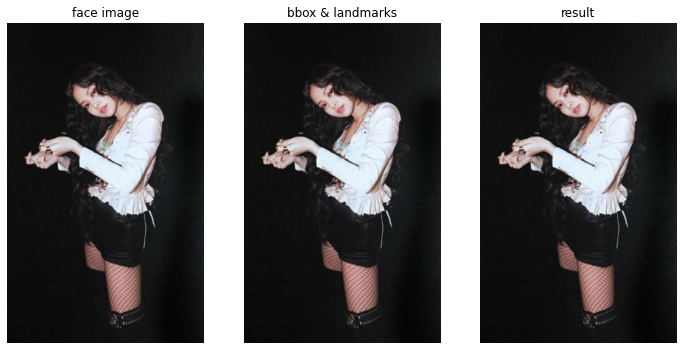

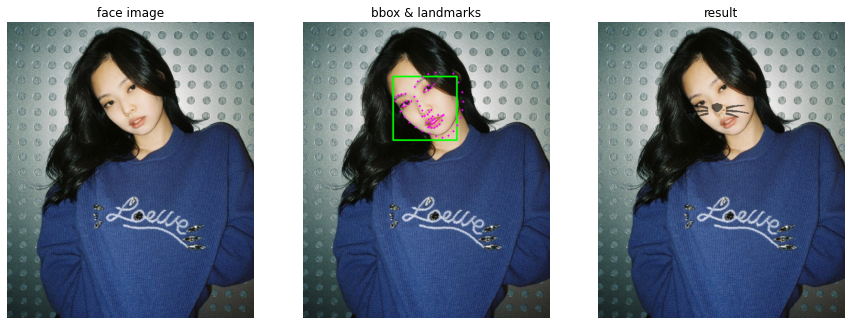

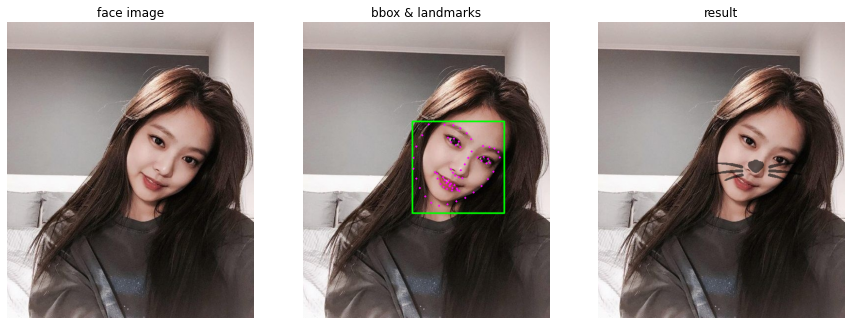

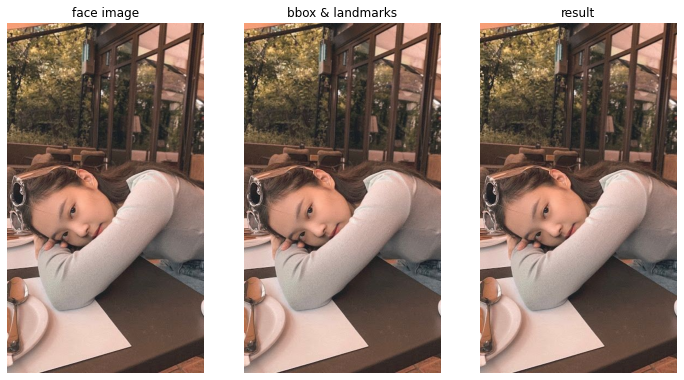

In [45]:
res = [ test(img_data[0], img_data[1], sticker_img, 0) for img_data in solo_imgs['rotated'] ]

- 출력된 이미지를 가장 위에 있는 이미지부터 rotated 1, 2, 3, 4 순으로 명명하였다.
- rotated1, 4는 face detection에 실패하였고 rotated2, 3d은 성공하였다.
- 하지만 ratated2, 3의 경우에도 턱의 영역을 실제보다 더 외곽으로 지정하거나 입 주변의 landmark들이 밀집해 있거나 하는 문제를 가지고 있다. 즉, face detection에 성공은 하였지만 이전 평가에서 사용되었던 고개를 기울이지 않은 사진에 비하면 불완전한 성공이라고 볼 수 있다.

##### 이미지를 회전 시켰을 때의 차이

- 얼굴의 각도와 detection의 성공 여부의 연관성을 더 확실히 하기 위하여 위에서 face detection에 성공하였던 rotated3 이미지를 이용하여 추가적인 실험을 해보고자 한다.
- 얼굴 이미지를 90도씩 시계방향으로 회전시켜 가며 face detection이 성공하는지의 여부를 확인한다.

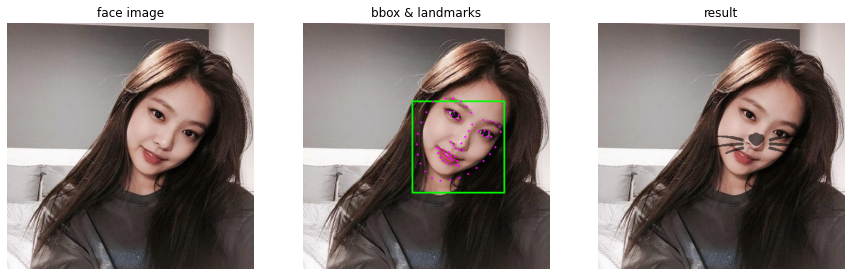

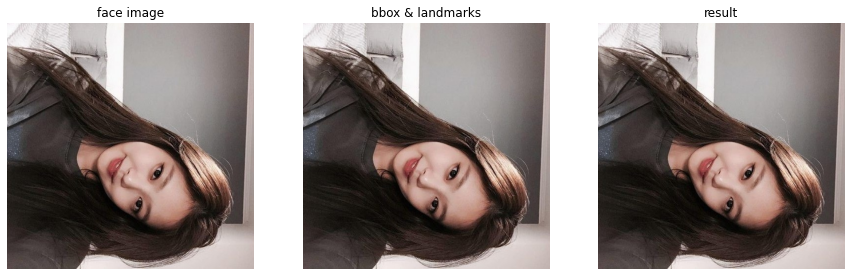

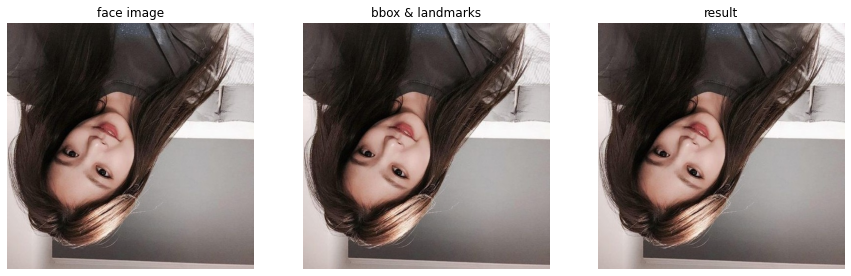

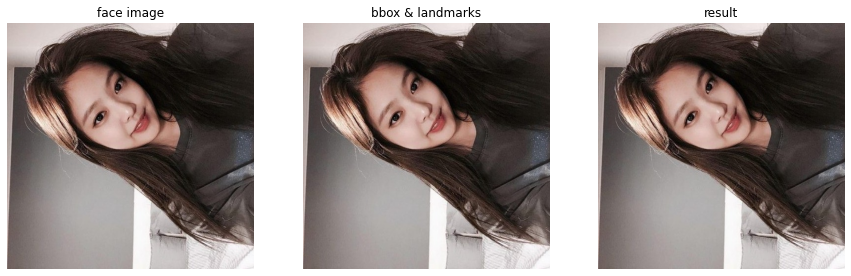

In [46]:
res = [ test(img_data[0], img_data[1], sticker_img, 0) for img_data in solo_imgs['clockwise'] ]

- 출력된 이미지를 가장 위에 있는 이미지부터 clockwise 1, 2, 3, 4 순으로 명명하였다.
- 출력 이미지들의 원본이라 할 수 있는 clockwise 1만이 face dectection에 성공하였고 나머지 이미지는 모두 실패하였다.
- 이전에 살펴 보았던 이미지의 밝기와 촬영거리에 대한 face dectection에서는, 너무 어둡거나 화질이 떨어져 육안으로 보기에도 얼굴의 윤곽이 뚜렷하지 않은 경우에 detection의 결과가 실패로 나왔었다. 하지만 이번 이미지들은 이전과 달리 육안으로 완벽하게 이목구비를 구별해 낼 수 있음에도 face detection이 실패하였다. 이전에는 문제를 입력 데이터(사진)에서 찾았다면 이제는 face detection의 학습의 불완전함에 대해 생각해 볼 때이다.
- 프로젝트에 사용된 face detector은 gradient를 추출하고 이와 기존에 학습된 gradient를 비교하는 것으로 얼굴의 bounding box를 탐색한다. 즉 학습에 사용된 데이터에 현재 입력하는 얼굴 이미지와 유사한 경우가 존재하지 않는다면 bbox를 찾는것은 요원한 일일 것이다.
- 이번 실험을 통하여 dlib의 face detector가 기울어져 있는 얼굴 이미지에 대한 학습이 부족하지 않을까?하는 의심이 생기게 되었다.

### 4. 방해물에 따른 성능평가

우리는 일상생활에서 얼굴에 다양한 아이템을 걸치게 된다. 따라서 얼굴을 인식하여 추가 작업을 진행하는 어플리케이션은 어느정도 방해물이 있어도 사진에서 얼굴을 정상적으로 인식해야 할 필요가 있다. 따라서 이번 항목에서는 사람들이 자주 사용하는 아이템인 안경, 선글라스, 마스크를 착용하였을 때 face detection이 정상적으로 이루어지는 지를 확인해 보고자 한다.

- 안경

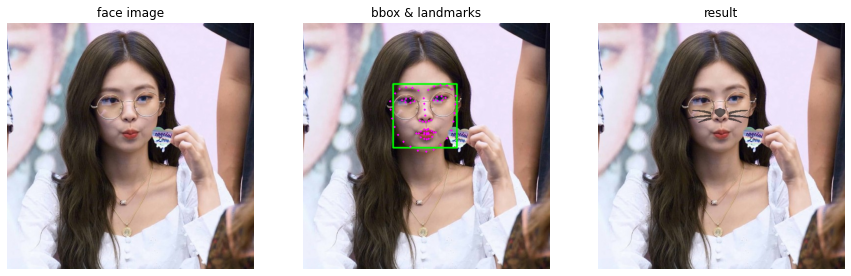

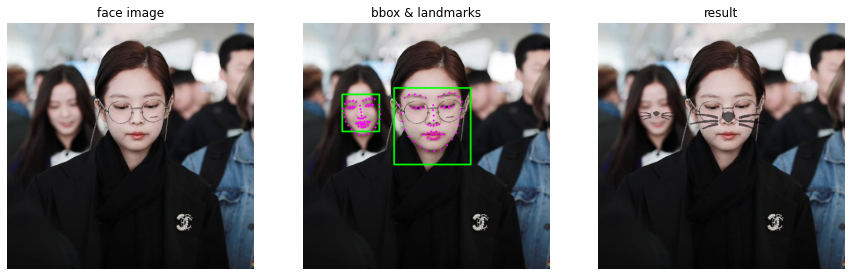

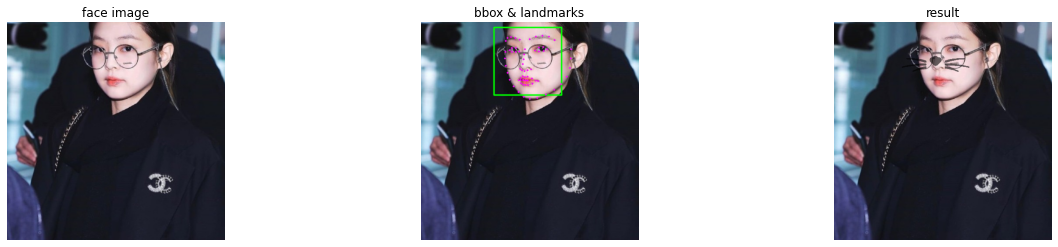

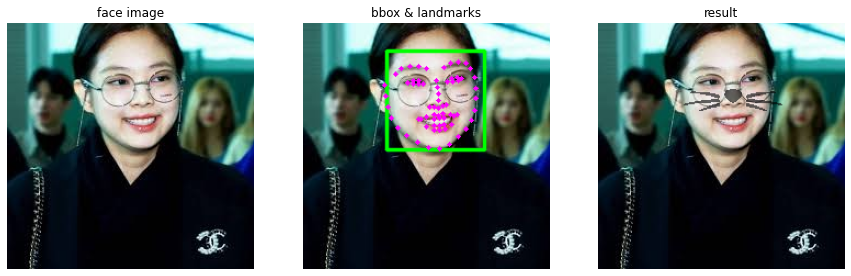

In [48]:
res = [ test(img_data[0], img_data[1], sticker_img, 0) for img_data in solo_imgs['glass'] ]

- 선글라스

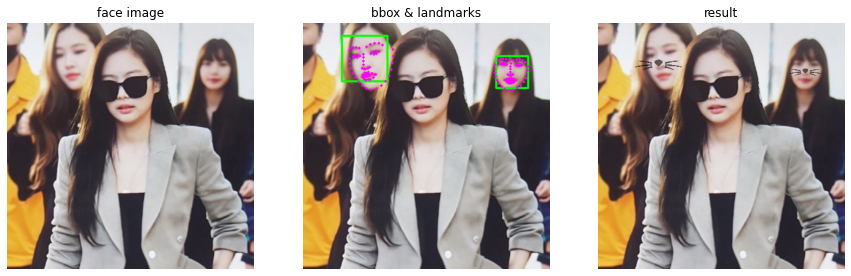

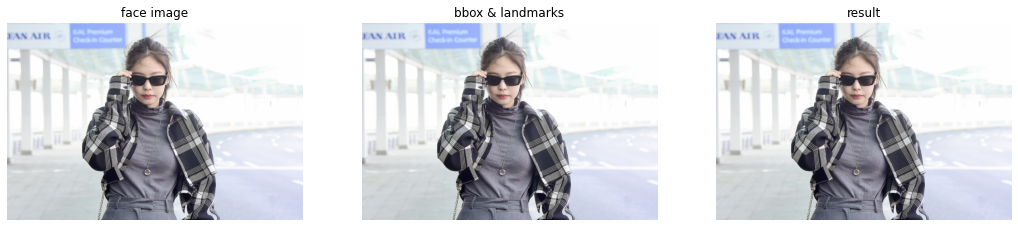

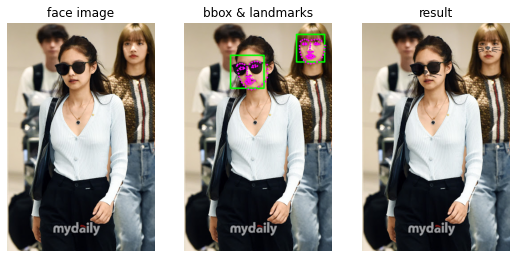

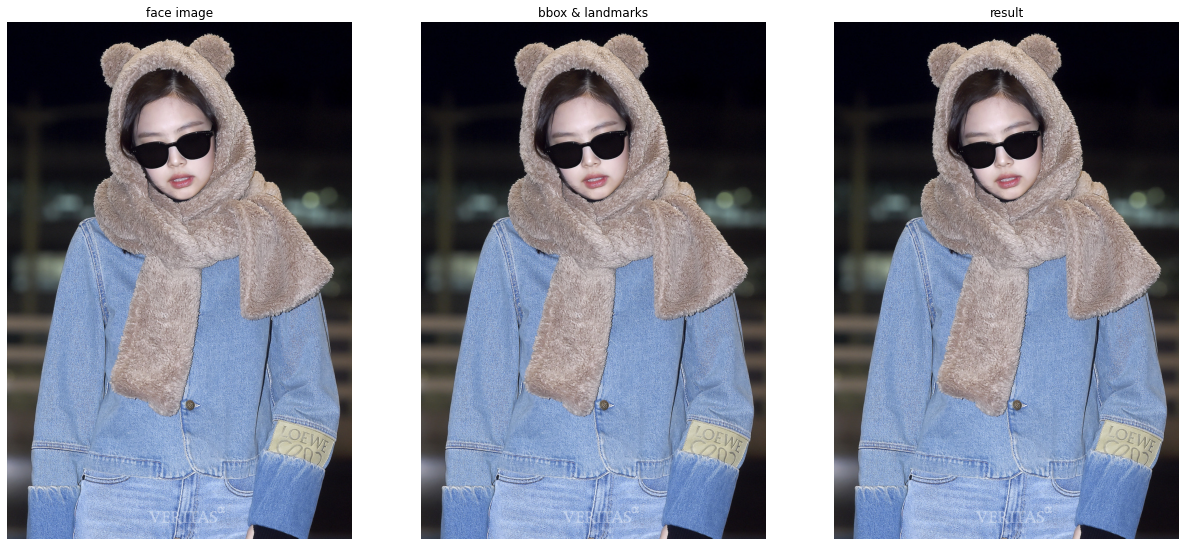

In [49]:
res = [ test(img_data[0], img_data[1], sticker_img, 0) for img_data in solo_imgs['sunglass'] ]

- 마스크

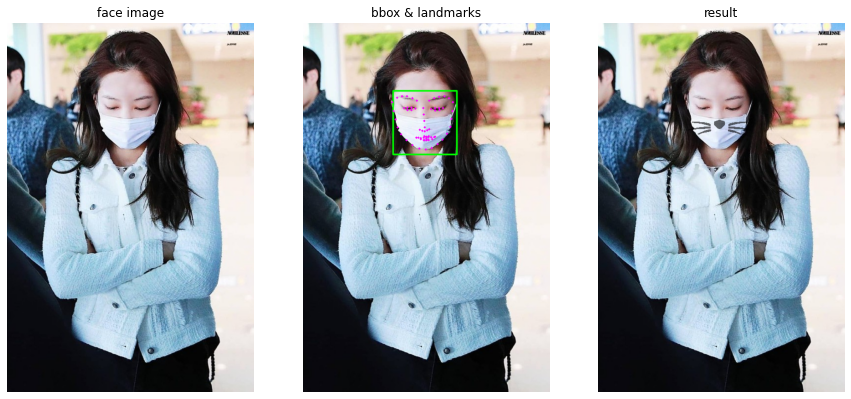

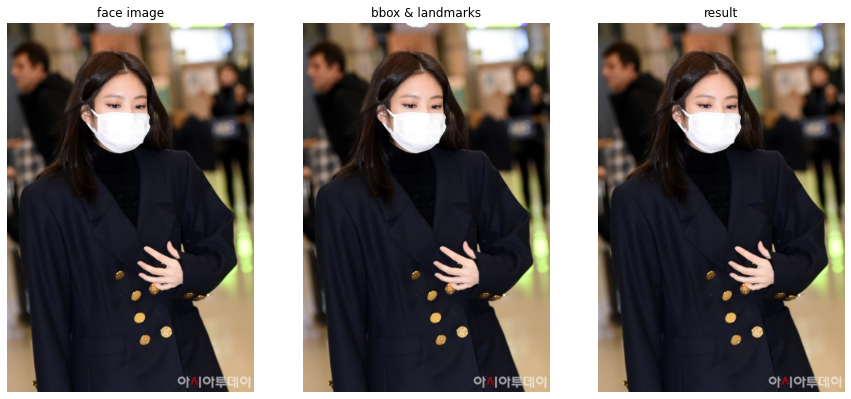

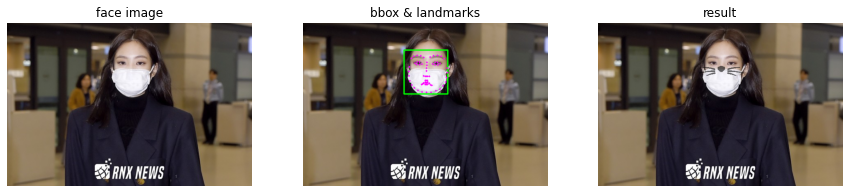

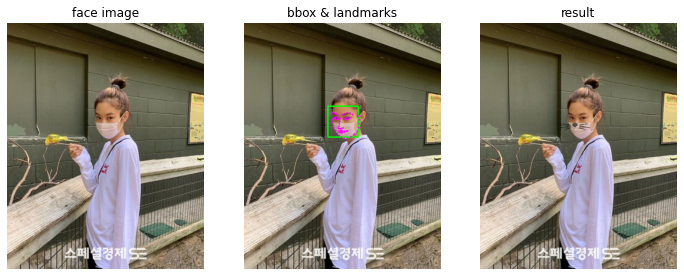

In [50]:
res = [ test(img_data[0], img_data[1], sticker_img, 0) for img_data in solo_imgs['mask'] ]

- 출력된 이미지를 가장 위에 있는 이미지부터 glass 1, 2, 3, 4 / sunglass 1, 2, 3, 4 / mask 1, 2, 3, 4로 명명하였다.
- face detection에 성공한 이미지와 실패한 이미지를 나누면 아래와 같다.
    - 성공 : glass1, glass2, glass3, glass4, sunglass3, mask1, mask3, mask4
    - 실패 : sunglass1, sunglass2, sunglass4, mask2
- 먼저 안경의 경우 얼굴을 인식하는 것에 거의 영향을 미치지 않았다. 다만 안경을 쓰지 않은 이미지들에서는 bbox가 실제 얼굴의 경계 안쪽에 있는 경향성을 보였는데, 안경을 쓴 상태에서는 이전보다 bbox가 살짝 더 크게 잡히는 것이 목격 되었다. 특히 glass3의 경우, 안경테가 인물에 비해 많이 커 얼굴과 안경테 사이에 가격이 존재하지만, bbox의 왼쪽의 경계면이 얼굴의 외곽라인이 아닌 안경테의 끝과 유사한 곳에 형성됨을 확인 할 수 있다. 하지만 bbox가 너무 크거나 작은 경우가 아니라면 face landmark에는 큰 영향을 미치지 않으므로, 무시할 수 있을 정도의 오차라고 생각된다. 즉, 얼굴을 가리지 않는 안경의 경우 face detection에 큰 영향을 미치지 못한다.
- 일반 안경에 비하여 눈 근처 영역의 픽셀 값을 극적으로 변화시키는 선글라스의 경우, sunglass3을 제외한 모든 이미지에 대하여 face detection에 실패하였다. 인물이 선글라스를 착용한다는 것은 선글라스 영역의 픽셀값이 0 근처로 변환된다는 것과 같은 의미라고 볼 수 있고 이는 그 근방의 gradient의 값에도 영향을 주기 때문에 face detection을 방해하는 요소가 된다. 선글라스를 착용한 상태에서도 face detection이 가능하려면 선글라스가 반투명하여 선글라스 아래의 굴곡이 비쳐야 할 것이다.
- 마스크의 경우 얼굴의 많은 영역을 가리기 때문에 face detection이 어려울 것으로 예상하였으나, 시험결과 준비한 이미지의 3/4이 face detection에 성공하였다. gradient를 사용하여 얼굴의 윤곽을 만들어 가기 때문에 마스크 아래에 입체감이 어느정도 드러나면 이를 활용하여 face detection을 성공시키는 것을 추정된다.
- 정리
    - 테스트 결과, face detection에 있어서
        - 안경은 거의 방해가 되지 않고
        - 마스크는 어느 정도 방해가 되고
        - 선글라스는 큰 방해가 된다.
    - face detection에 있어서 방해가 될 수 있는 요소는 얼굴의 입체감을 지워 gradient의 값에 혼동을 줄 수 있는 무언가이다.

### 5. 여러명의 사람이 등장하는 사진들에 대한 성능평가

이전 성능평가에서는 독사진을 가지고 이런저런 테스트를 해보았으므로 이번에는 한번에 '얼마나 많은' 양을 처리할 수 있는지를 확인해 보고자 한다. 사진에 등장하는 인물의 수를 제외한 변수를 줄이기 위하여 평가에 사용할 이미지를 선정할 때 다음 사항들을 만족시키는 이미지를 골랐다.
- 얼굴을 가리고 있는 방해물이 없다.
- 얼굴의 크기가 너무 작아지지 않도록 이미지의 화질이 충분해야 한다.
- 너무 어둡거나 너무 밝거나 하는 등 육안으로도 이목구비의 구분이 불가능한 이미지는 제외한다.

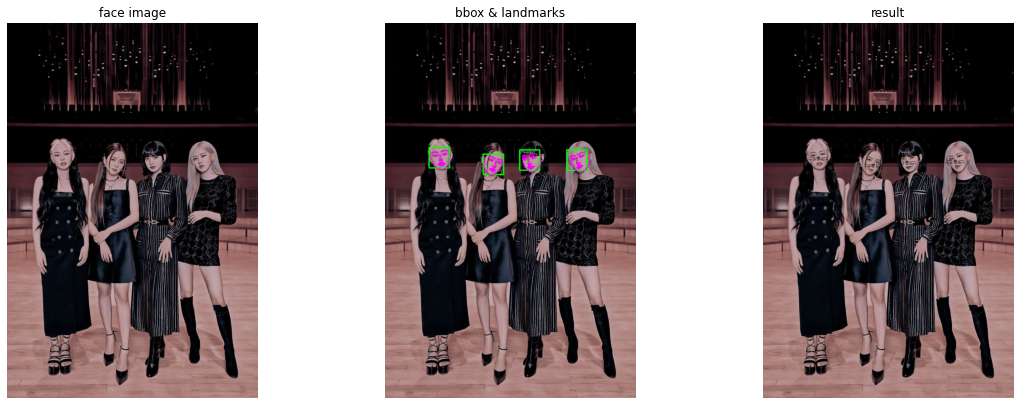

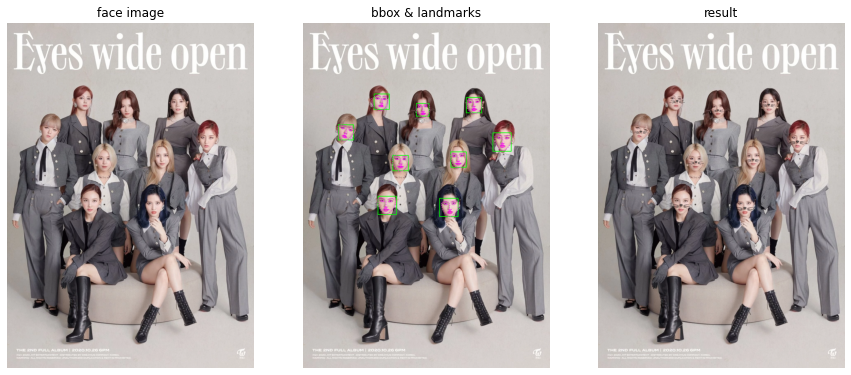

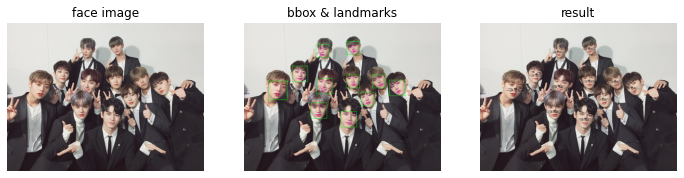

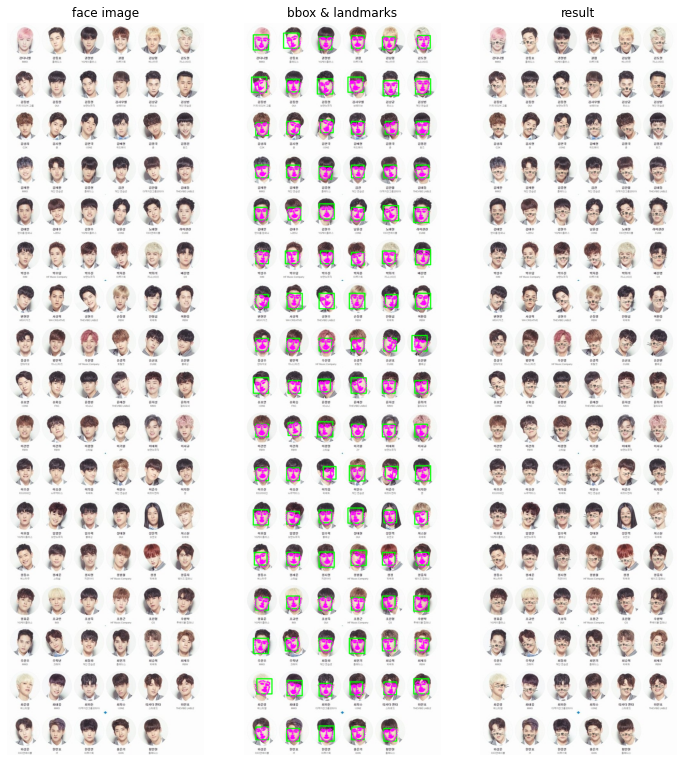

In [51]:
res = [ test(img_data[0], img_data[1], sticker_img, 0) for img_data in team_imgs ]

- 출력된 이미지를 가장 위에 있는 이미지부터 team 1, 2, 3, 4로 명명하였다. 이미지의 넘버링이 커질 수록 이미지에 등장하는 인물의 수가 증가한다. 
- 사진에 등장하는 인물의 수
    - team1 : 4
    - team2 : 9
    - team3 : 11
    - team4 : 101
- 놀랍게도 모든 이미지에서 모든 얼굴에 대한 face detection에 성공하였다! 깔끔하게 통과할만한 이미지를 일부러 찾아 입력으로 제공하기는 하였지만 team4에서 101명 모두에 대한 탐색을 성공하리라 생각치 못하였다.
- 이를 통해 dlib의 face dector은 적절한 이미지가 주어진다면 한 이미지에서 다수의 face bounding를 찾아 낼 수 있을을 확인할 수 있었다.

## 결론
---

### 요약
- 목표 : 인물 사진이 주어졌을 때, 적절한 위치에 고양이 수염 스티커를 붙인다.
- 프로젝트 진행 과정
    - 스티커와 인물 사진 수집
    - dlib의 face detector를 이용한 face bounding box 찾기
    - dlib의 shape predictor와 dlib 제공하는 모델을 이용하여 face landmark 찾기
    - 스티커를 불러들여 스티커 적용 위치 탐색
    - 스티커 붙이기
    - 다양한 인물 사진을 이용하여 작성된 코드를 평가
- face detection에 영향을 줄 수 있는 요소들
    - 이미지의 밝기와 빛
    - 이미지 촬영거리와 화질
    - 얼굴의 각도
    - 얼굴의 굴곡을 가리는 방해물

### 프로젝트 평가
1. 자기만의 카메라앱 기능 구현을 완수하였는가? 원본에 스티커 사진이 정상적으로 합성되었는가?
- 그렇다. 원본 사진에 스티커 사진이 정상적으로 합성되었다.

2. 스티커 이미지를 정확한 원본 위치에 반영되었는가? 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었는가?
- 스티커의 위치는 스티커의 중앙지점이 얼굴의 중심인 코의 중심에 올라오도록 하는 것으로 설정하였다. 대부분의 경우에 이 방식은 스티커 이미지 위치를 선정하는 것에 긍정적인 결과를 보여주었다.
- 스티커를 반투명하게 만들어 얼굴 이미지와 합성하는 것으로 스티커가 얼굴에 잘 어울리게 출력되도록 하였다.
- 다만 원본 얼굴이 기울어져 있다면 스티커 이미지 역시 회전을 한 상태로 합성되는 것이 적절하겠으나 본 프로젝트에서는 이 점이 코드에 반영되지 못하였다.

3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였는가? 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였는가?
- 다양한 경우의 이미지를 수집하였다. 그리고 그들을 이용하여 다양한 경우 코드가 어떻게 동작하는지를 확인하고 이에 대해 생각해 보았다.

### 회고
1. 이번 프로젝트에서 어려웠던 점 : 이번 프로젝트는 이론적으로 어렵다기 보다는 은근히 어렵거나 헷갈리는 것이 있었던 프로젝트였다.
    - 먼저 사진을 모으는 것이 은근히 어려웠다. 처음에는 나의 셀카 이미지를 사용하여 프로젝트를 진행하였는데 생각보다 많고 다양한 경우의 이미지가 필요해져서 혼자 찍어서 사용하는 것으로는 부족하였다. 그리하여 인터넷의 바다에서 적절한 이미지를 선발해 나갔고 실제적으로 코드를 작성하는 시간보다 이미지를 선정하고 다운로드 받는것에 더 오랜 시간이 걸렸던 것 같다.
    - 다음으로 shape로 이미지의 크기를 확인할 때, shape[0]이 세로, shape[1]이 가로인 점이 개인적으로 괴로웠다. x -> y 순으로 나열하는 것이 익숙해져 있었기에 코드를 작성할 때 이 부분에서 실수를 많이 하였다.
    - 프로젝트를 진행하면서 사진을 모으는 것 다음으로 시간을 많아 할애했던 부분은 스티커를 붙이는 부분이었다. 기존에 c 환경에서 openCV를 사용한 적이 있는데 이미지를 합성할 때 노드에서 제시한 것처럼 배열의 특정 부분에 직접 값을 업데이트 하는 것이 아닌, `add` 같은 함수를 이용한 업데이트만을 해보았어서 이런 진행이 신기하였다.

2. 프로젝트를 진행하면서 cs231n에서 배운 이미지의 인식이 어려운 이유에 대해 생각이 났었다. 학습할 당시에는 그렇구나~하고 넘어갔던 내용이 이번 프로젝트를 하면서 피부로 와닿았다. 예를들어 face detection에 성공한 이미지를 90도 회전을 시켰더니 face detection에 실패한 것은 viewpoint variation을 생각나게 한다. 사람이 보기에는 한눈에 두 이미지가 같은 이미지임을 알 수 있지만, 컴퓨터의 입장에서는 둘을 전혀 다른 이미지로 인식하게 되어 detection에 실패하는 것이다. 이미지의 밝기에 따라 detection 여부가 달라지는 것(illumination)도 이미지에 방해요소(occlusion)가 있을 때 인식이 어려웠던 점도 마찬가지였다. 서로 다른 시간에 배워가는 항목들이 서로 연결되는 재미가 레고를 맞춰가는 것 마냥 쏠쏠하다고 느껴졌다.

### 추가 학습 사항
이번 프로젝트를 진행하면서 생각한 프로젝트 이후에 추가적으로 더 공부하면 좋을만한 항목들을 생각해 보았다.

1. OpenCV에서의 이미지 연산
    - 사칙연산, 알파블렌딩, 비트연산
2.  face detector
    - dlib의 face detector 이외의 다른 face detector은 어떤 것이 있을까?

## Code Cellection
---

#### import packages

In [1]:
import cv2 # 이미지 처리
import matplotlib.pyplot as plt # 출력
import numpy as np
import os, glob
import dlib
import pandas as pd

# set workspace constant
workspace_path = os.getenv('HOME')+'/workspace/aiffel-exploation-workspace/E03_camera_sticker'

#### 이미지 불러오기 : `load_image`

In [2]:
def load_image(path):
    """
    이미지를 불러옵니다.
    
    Args:
        path (str): 이미지의 경로
        
    Returns:
        ndarray: 불러들인 이미지
    """
    return cv2.imread(path)

#### 이미지 출력 : `show_image`

In [3]:
def show_image(img, title="", size=""):
    """
    이미지를 출력합니다.
    
    Args:
        img (ndarray): 이미지
        title (str): plt의 타이틀, default는 ""이다.
        size (tuple(int,int)): 출력할 이미지의 figure size, default는 ""이다.
    """
    
    if size != "":
        plt.figure(figsize=size)
        
    plt.title(title)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

#### face detection : `detect_face`

In [4]:
def detect_face(face_img):
    """
    dlib.fhog_object_detector를 이용하여 얼굴 이미지의 bounding box 찾아 반환한다.
    
    Args:
        face_image (ndarray): bounding box를 찾을 얼굴 이미지
        
    Returns:
        dlib.rectangles: face_img에서 찾아낸 bounding box의 배열
    """
        
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rects = detector_hog(face_img, 1)

    return dlib_rects

#### face detection으로 찾아낸 bounding box 출력 : `get_face_with_bbox`

In [5]:
def get_face_with_bbox(dlib_rects, face_image):
    """
    얼굴 이미지에 dlib.fhog_object_detector 이용하여 찾은 bounding box를 올린 이미지를 반환
    
    Args:
        dlib_rects (list): bounding box의 리스트
        face_image (ndarray): bounding box를 올린 얼굴 이미지, 배경 이미지
        
    Returns:
        ndarray : bbox가 그려진 face_image
    """
    disp_img = face_image.copy()
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        cv2.rectangle(disp_img, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
    return disp_img

#### face landmark 탐색 : `detect_face_landmark`

In [6]:
def detect_face_landmark(face_img, dlib_rects):
    """
    `dlib.shape_predictor`를 이용하여 얼굴 이미지에서 68개의 face landmark를 찾아 반환한다.
    
    Args:
        face_img (ndarray): face landmark를 찾을 얼굴 이미지
        dlib_rects (list): bounding box의 리스트
        
    Returns:
        list: face landmark를 담고 있는 list
    """
        
    model_path = workspace_path + '/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(face_img, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
    
    return list_landmarks

#### face landmark가 그려진 얼굴 이미지 생성 : `get_face_with_landmark`

In [7]:
def get_face_with_landmark(face_img, list_landmarks):
    """
    얼굴 이미지에 face landmark를 올린 이미지를 반환한다.
    
    Args:
        face_img (ndarray): face landmark를 올린 얼굴 이미지, 배경 이미지
        list_landmarks (list): face landmark를 담고 있는 list
    
    Returns:
        ndarray : landmark가 그려진 face_image
    """
    disp_img = face_img.copy()
    for landmark in list_landmarks:
        for idx, point in enumerate(landmark):
            cv2.circle(disp_img, point, 2, (255, 0, 255), -1)

#     show_image(disp_img, 'face landmark', fig_size)
    return disp_img

#### 스티커 1차 크기 조정 : `get_resized_stickers`

In [8]:
def get_resized_stickers(sticker_img, dlib_rects):
    """
    스티커의 가로, 세로 길이가 bounding box들의 width와 같게 되도록 크기를 재조정한다.
    크기가 재조정된 스티커들을 모은 list를 반환한다.
    
    Args:
        sticker_img (ndarray): 스티커 이미지
        dlib_rects (list): bounding box의 리스트
        
    Returns:
        list: 크기가 재조정된 스티커들을 모은 list
    """
    widths = list(map(lambda dlib_rect: dlib_rect.width(), dlib_rects))
    resized_stickers = []
    for width in widths:
        resized_stickers.append(cv2.resize(sticker_img.copy(), (width, width)))

    return resized_stickers

#### 스티커 위치 선정 : `get_stickter_pos_with_center_pos`

In [9]:
def get_stickter_pos_with_center_pos(list_landmarks, dlib_rects, sticker_imgs):
    """
    스티커의 시작점의 위치와 스티커의 사이즈를 list 형태로 반환한다.
    스티커의 위치는 스티커의 중앙점과 30번 landmark(코의 중앙)이 일치되도록 하는 지점이다.
    
    Args:
        list_landmarks (list): face landmark를 담고 있는 list
        dlib_rects (list): bounding box의 리스트
        sticker_imgs (list): 스티커 이미지의 리스트
        
    Returns:
        list: 스티커들의 시작점을 모아 놓은 list
    """
    sticker_positions = []
    
    for i in range(len(list_landmarks)):
        nose_center_point = list_landmarks[i][30]
        sticker_h, sticker_w, c = sticker_imgs[i].shape
        sticker_center_point = (sticker_w // 2, sticker_h // 2)
        sticker_positions.append((nose_center_point[0] - sticker_center_point[0], nose_center_point[1] - sticker_center_point[1]))
    
    return sticker_positions

#### 스티커 2차 크기 조정 : `get_croped_stickers`

In [10]:
def crop_sticker(face_img, sticker_img, sticker_position):
    """
    스티커가 얼굴 사진의 외부로 튀어나갔다면 그 부분을 잘라낸다. 
    
    Args:
        face_img (ndarray): face landmark를 찾을 얼굴 이미지
        sticker_img (ndarray): 스티커 이미지
        sticker_position (list): 스티커의 시작점
        
    Returns:
        ndarray: 잘라진 스티커 이미지
    """
    
    # shape 값과 유사한 indexing을 위하여 y, x 순서로 할당
    refined = [sticker_position[1], sticker_position[0]]
    sticker_img_size = [sticker_img.shape[0], sticker_img.shape[1]]
    face_img_size = [face_img.shape[0], face_img.shape[1]]
    
#     print('before crop : {}'.format(sticker_img.shape))

    # 스티커 사진의 시작점의 y 좌표가 음수인 경우
    if refined[0] < 0 :
        sticker_img = sticker_img[-reined[0]:,:]
        refined[0] = 0
#         print('crop upper side : {}'.format(sticker_img.shape))
        
        
    # 스티커 사진의 시작점의 x 좌표가 음수인 경우
    if refined[1] < 0 :
        sticker_img = sticker_img[:,-reined[1]:]
        refined[1] = 0
#         print('crop left side : {}'.format(sticker_img.shape))
    
    # sticker_position y + sticker_img size > face_img size
    if refined[0] + sticker_img_size[0] > face_img_size[0]:
        crop_val = refined[0] + sticker_img_size[0] - face_img_size[0]
        sticker_img = sticker_img[:-crop_val,:]
#         print('crop lower side : {}'.format(sticker_img.shape))
    
    if refined[1] + sticker_img_size[1] > face_img_size[1]:
        crop_val = refined[1] + sticker_img_size[1] - face_img_size[0]
        sticker_img = sticker_img[:,:-crop_val]
#         print('crop right side : {}'.format(sticker_img.shape))    
    
#     print('after crop : {}'.format(sticker_img.shape))
#     print('refined sticker position : {}'.format((refined[1], refined[0])))
    return sticker_img, (refined[1], refined[0])

In [11]:
def get_croped_stickers(face_img, stickers, stickers_pos):
    """
    얼굴 사진과 스티커들, 얼굴 사진에서의 각 스터커의 시작 위치를 입력받아
    스티커를 적절하게 잘라낸다. 
    
    Args:
        face_img (ndarray): face landmark를 찾을 얼굴 이미지
        stickers (list(ndarray)): 스티커 이미지들을 모아놓은 리스트
        stickers_pos (list(list)): 스티커들의 시작 지점들
        
    Returns:
        ndarray: 잘라진 스티커 이미지
    """
    
    croped_stickers = []
    for i in range(len(stickers)):
        croped_sticker, stickers_pos[i] = crop_sticker(face_img, stickers[i], stickers_pos[i])
        croped_stickers.append(croped_sticker)
    
    return croped_stickers

#### 스티커 붙이기 : `get_face_with_sticker`

In [12]:
def get_mask(target_img, target_type):
    """
    입력된 이미지의 타입에 따라 이미지 합성을 위한 mask를 반환한다.
    
    Args:
        target_img (ndarray): 이미지
        target_type (int): 0(배경이 흰색이고 내용이 검은색인 바이너리 스티커 이미지), 나머지(배경이 흰색이고 내용의 모든 색상이 검은색이 아닌 스티커 이미지)
    
    Returns:
        ndarray, ndarray: 생성한 mask와 mask에서 반전된 이미지인 mask_inv
    """
    
    if target_type == 0:
        # 배경이 흰색이고 내용이 검은색은 바이너리 스티커
        img2gray = cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)
        ret, mask_inv = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
        mask = cv2.bitwise_not(mask_inv) 
    else :
        # colored
        # mask -> sticker에 내용이 있으면 흰색(255), 바탕은 검은색(0)
        # mask_inv -> sticker에 내용이 있으면 검은색(0), 바탕은 흰색(255)
        img2gray = cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)
        ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
        mask_inv = cv2.bitwise_not(mask)
        
    return mask, mask_inv

In [13]:
def put_sticker(face_img, sticker_img, sticker_type, sticker_pos):
    """
    얼굴 이미지에 스티커 이미지를 붙여서 반환한다.
    
    Args:
        face_img (ndarray): 스티커를 붙일 이미지, 배경 이미지
        sticker_img (ndarray): 스티커 이미지
        sticker_type (int): 스티커의 유형, 0(배경이 흰색이고 내용이 검은색인 바이너리 스티커 이미지), 나머지(배경이 흰색이고 내용의 모든 색상이 검은색이 아닌 스티커 이미지)
        sticker_pos (tuple(int,int)): face_img 상에 스티커를 붙일 위치, 스티커 이미지의 시작점이 이 곳에 위치된다.
    
    Returns:
        ndarray: 스티커를 붙인 얼굴 이미지
    """    
    # 스티커의 row col cahnnel 정보
    rows, cols, channels = sticker_img.shape
    
    # Region of interest
    # face_img에서 스티커를 붙일 부분
    roi = face_img[sticker_pos[1]:sticker_pos[1] + sticker_img.shape[0], 
                   sticker_pos[0]:sticker_pos[0] + sticker_img.shape[1]].copy()
    
    mask, mask_inv = get_mask(sticker_img, sticker_type)
    
    # bitwise_and 연산자는 둘다 0이 아닌 경우만 값을 통과 시킴.
    # 즉 mask가 검정색이 아닌 경우만 통과가 되기때문에 mask영역 이외는 모두 제거됨.
    face_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
    sticker_fg = cv2.bitwise_and(sticker_img, sticker_img, mask=mask)

    #2개의 이미지를 합치면 바탕은 제거되고 logo부분만 합쳐짐.
    dst = cv2.addWeighted(roi, 0.4, sticker_fg, 0.6, 0)
    face_img[sticker_pos[1]:sticker_pos[1]+rows, sticker_pos[0]:sticker_pos[0]+cols] = \
        np.where(face_bg==0,dst,roi).astype(np.uint8)
    
    return face_img, [roi, mask, mask_inv, face_bg, sticker_fg, dst, face_img[sticker_pos[1]:sticker_pos[1]+rows, sticker_pos[0]:sticker_pos[0]+cols].copy()]

In [14]:
def get_face_with_sticker(face_img, stickers, stickers_pos, sticker_type):
    face_with_sticker = face_img.copy()
    for i in range(len(stickers)):
        face_with_sticker = put_sticker(face_with_sticker, 
                                        stickers[i], 
                                        sticker_type, stickers_pos[i])[0]
    return face_with_sticker

In [15]:
def get_face_with_sticker_with_log(face_img, stickers, stickers_pos, sticker_type):
    face_with_sticker = face_img.copy()
    for i in range(len(stickers)):
        face_with_sticker, log = put_sticker(face_with_sticker, 
                                        croped_stickers[i], 
                                        sticker_type, stickers_pos[i])
        
    titles = ['roi', 'mask', 'mask_inv', 'face_bg', 'sticker_fg', 'dst', 'roi']
    fig, ((ax1,ax2,ax3,ax4), (ax5,ax6,ax7,ax8)) = plt.subplots(2,4,figsize=(10,5))
    axs = [ax1,ax2,ax3,ax5,ax6,ax7,ax8]
    for i in range(7):
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(log[i], cv2.COLOR_BGR2RGB))
        axs[i].set_title(titles[i])
    ax4.axis('off')
    fig.show()
    
    return face_with_sticker

#### 스티커 테스트 : `test`

In [16]:
def test(face_img, img_disp_size, sticker_img, sticker_type):
    # detector를 이용하여 얼굴의 bounding box를 추출
    dlib_rects = detect_face(face_img)
    img_log = get_face_with_bbox(dlib_rects, face_img)
    

    # face landmark 탐색
    landmarks = detect_face_landmark(face_img, dlib_rects)
    img_log = get_face_with_landmark(img_log, landmarks)
    
    # 스티커 적용 위치 확인하기
    resized_stickers = get_resized_stickers(sticker_img, dlib_rects)
    stickers_pos = get_stickter_pos_with_center_pos(landmarks, dlib_rects, resized_stickers)
    
    # 스티커 적용하기
    croped_stickers = get_croped_stickers(face_img, resized_stickers, stickers_pos)
    img_result = get_face_with_sticker(face_img, croped_stickers, stickers_pos, sticker_type)
        
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(img_disp_size[0]*3,img_disp_size[1]))
    plt.rc('axes', labelsize=2)
    
    ax1.axis('off')
    ax1.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
    ax1.set_title('face image')
    
    ax2.axis('off')
    ax2.imshow(cv2.cvtColor(img_log, cv2.COLOR_BGR2RGB))
    ax2.set_title('bbox & landmarks')
    
    ax3.axis('off')
    ax3.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
    ax3.set_title('result')

    return img_result

In [ ]:
%config Completer.use_jedi = False

## ref
- [OpenCV-Python Study documentation!-이미지 연산](https://opencv-python.readthedocs.io/en/latest/doc/07.imageArithmetic/imageArithmetic.html#id2)
- [이미지 연산 처리를 이용한 이미지 합성하기](https://blog.naver.com/samsjang/220503082434)
- [OpenCV - 9. 이미지 연산](https://bkshin.tistory.com/entry/OpenCV-9-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%97%B0%EC%82%B0)
- [Python과 OpenCV – 7 : 이미지에 대한 산술 연산](http://www.gisdeveloper.co.kr/?p=6407)
- [Python에서 json파일 다루기 (읽기, 쓰기, 수정)](https://devpouch.tistory.com/33)
- [히스토그램](https://opencv-python.readthedocs.io/en/latest/doc/19.imageHistograms/imageHistograms.html)
- [OpenCV - calcHist()](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d)